Enter whether you would like to compare a QB, WR, RB, or a TE: 
RB
Enter player name 1: Damien Wilson
Enter player name 2: Chris Carson
Sorry, one of your responses is not in the current data set. Please provide the current First and Last names of the players you are interested in. 
Enter player name 1: Damian Wilson
Enter player name 2: Chris Carson
Sorry, one of your responses is not in the current data set. Please provide the current First and Last names of the players you are interested in. 
Enter player name 1: Dalvin Cook
Enter player name 2: Josh Jacobs
You may choose the following stat catagories 

RushingAtt, RushingYDs, Y/A, RushingTD, Tgt, Rec, ReceivingYDs, Y/R, ReceivingTD

Enter what stat you are interested in comparing: 
R/A
Sorry, your response must be one of the previously listed stat for your chosen position.
Enter what stat you are interested in comparing: 
Y/A


,Player,Tm,Age,G,RushingAtt,RushingYDs,Y/A,RushingTD,Tgt,Rec,ReceivingYDs,Y/R,ReceivingTD,FL,FantasyPoints,FantasyPoints/GM,Usage/GM,Chosen Stat/GM
5,Dalvin Cook,MIN,24,14,250,1135,4.54,13,63,53,519,9.79,0,2,292.4,20.89,22.36,0.324286
35,Josh Jacobs,OAK,21,13,242,1150,4.75,7,27,20,166,8.30,0,1,191.6,14.74,20.69,0.365385


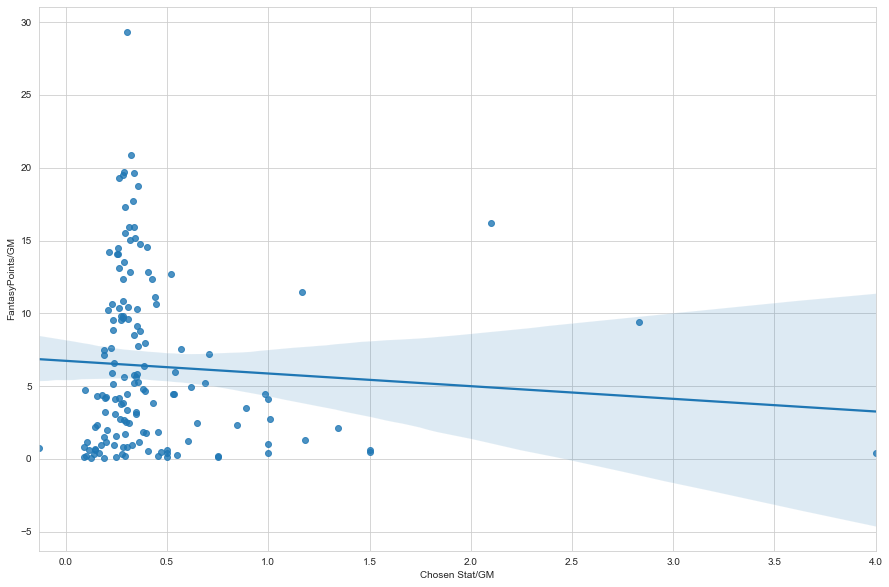

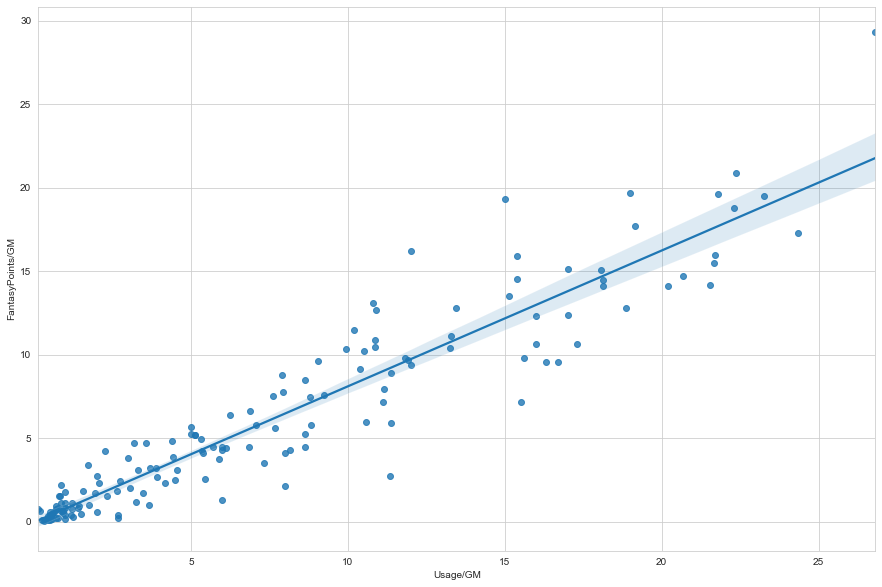

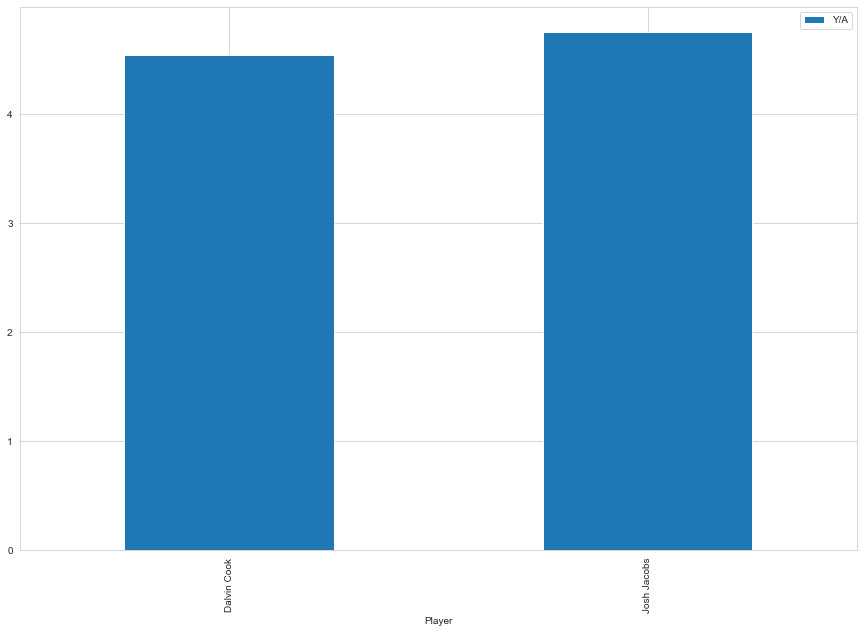

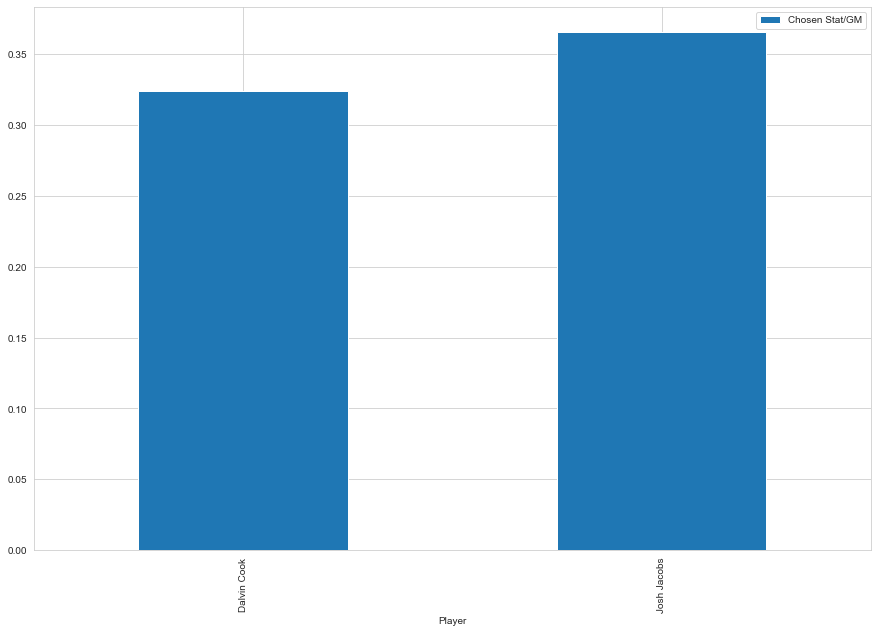

Would you like you compare another two players? Type Y for yes and N for no:
N


In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


while True:
    df = pd.read_csv('2019.csv')
    df['Player'] = df['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])
    
    while True:
        try:
            p_type = input("Enter whether you would like to compare a QB, WR, RB, or a TE: " + '\n')

        except ValueError:
            print("Sorry, I didn't understand that.")
            continue

        if p_type == 'QB' or p_type == 'WR' or p_type == 'RB' or p_type == 'TE':
            break
        else:
            print("Sorry, your response must be QB, WR, RB, or a TE.")
            continue
            
    while True:
        try:
            player_name1 = input("Enter player name 1: ")
            player_name2 = input("Enter player name 2: ")

        except ValueError:
            print("Sorry, I didn't understand that.")
            continue
            

        exitsp2 = player_name2 in df.Player
        if player_name1 in df.values and player_name1 in df.values: 
            break
            
        else:
            print("Sorry, one of your responses is not in the current data set. Please provide the current First and Last names of the players you are interested in. ")
            continue

    if p_type == 'QB':
        print("You may choose the following stat catagories " + '\n')
        print("RushingAtt, RushingYDs, Y/A, RushingTD, PassingAtt, PassingYDs, PassingTD, Int"+ '\n')
    elif p_type == 'WR':
        print("You may choose the following stat catagories " + '\n')
        print("RushingAtt, RushingYDs, Y/A, RushingTD, Tgt, Rec, ReceivingYDs, Y/R, ReceivingTD"+ '\n')
    elif p_type == 'RB':
        print("You may choose the following stat catagories " + '\n')
        print("RushingAtt, RushingYDs, Y/A, RushingTD, Tgt, Rec, ReceivingYDs, Y/R, ReceivingTD"+ '\n')
    elif p_type == 'TE':
        print("You may choose the following stat catagories " + '\n')
        print("RushingAtt, RushingYDs, Y/A, RushingTD, Tgt, Rec, ReceivingYDs, Y/R, ReceivingTD" + '\n')    

    while True:
        try:
            stat = input("Enter what stat you are interested in comparing: " + '\n')

        except ValueError:
            print("Sorry, I didn't understand that.")
            continue

        if p_type in['TE', 'WR', 'RB'] and stat in ['RushingAtt', 'RushingYDs', 'Y/A' , 'RushingTD', 'Tgt', 'Rec', 'ReceivingYDs', 'Y/R', 'ReceivingTD']:
            break
        elif p_type == 'QB' and stat in ['RushingAtt', 'RushingYDs', 'Y/A' , 'RushingTD', 'PassingAtt', 'PassingYDs', 'PassingTD', 'Int']:
            break

        else:
            print("Sorry, your response must be one of the previously listed stat for your chosen position.")
            continue


    df.drop(['Rk', '2PM', '2PP', 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank', 'PPR', 'Fmb', 'GS'], axis=1, inplace=True)


    df.rename({
    'TD': 'PassingTD',
    'TD.1': 'RushingTD',
    'TD.2': 'ReceivingTD',
    'TD.3': 'TotalTD',
    'Yds': 'PassingYDs',
    'Yds.1': 'RushingYDs',
    'Yds.2': 'ReceivingYDs',
    'Att': 'PassingAtt',
    'Att.1': 'RushingAtt'
    }, axis=1, inplace=True)

    rb_df = df[df['FantPos'] == 'RB']
    qb_df = df[df['FantPos'] == 'QB']
    wr_df = df[df['FantPos'] == 'WR']
    te_df = df[df['FantPos'] == 'TE']


    rushing_columns = ['RushingAtt', 'RushingYDs', 'Y/A', 'RushingTD']
    receiving_columns = ['Tgt', 'Rec', 'ReceivingYDs', 'Y/R', 'ReceivingTD']
    passing_columns = ['PassingAtt', 'PassingYDs', 'PassingTD', 'Int']

    def transform_columns(df, new_column_list):
        df = df[['Player', 'Tm', 'Age', 'G'] + new_column_list +['FL']]
        return df

    rb_df = transform_columns(rb_df, rushing_columns+receiving_columns)
    wr_df = transform_columns(wr_df, rushing_columns+receiving_columns)
    te_df = transform_columns(te_df, rushing_columns+receiving_columns)
    qb_df = transform_columns(qb_df, rushing_columns+passing_columns)

    rb_df['FantasyPoints'] = rb_df['RushingYDs']*0.1 + rb_df['RushingTD']*6 + rb_df['Rec'] + rb_df['ReceivingYDs']*0.1 + rb_df ['ReceivingTD']*6 - rb_df['FL']*2
    rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints']/rb_df['G']
    rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints/GM'].apply(lambda x: round(x, 2))
    rb_df['Usage/GM'] = (rb_df['RushingAtt'] + rb_df['Tgt'])/rb_df['G']
    rb_df['Usage/GM'] = rb_df['Usage/GM'].apply(lambda x: round(x, 2))

    wr_df['FantasyPoints'] = wr_df['RushingYDs']*0.1 + wr_df['RushingTD']*6 + wr_df['Rec'] + wr_df['ReceivingYDs']*0.1 + wr_df ['ReceivingTD']*6 - wr_df['FL']*2
    wr_df['FantasyPoints/GM'] = wr_df['FantasyPoints']/wr_df['G']
    wr_df['FantasyPoints/GM'] = wr_df['FantasyPoints/GM'].apply(lambda x: round(x, 2))
    wr_df['Usage/GM'] = (wr_df['RushingAtt'] + wr_df['Tgt'])/wr_df['G']
    wr_df['Usage/GM'] = wr_df['Usage/GM'].apply(lambda x: round(x, 2))

    te_df['FantasyPoints'] = te_df['RushingYDs']*0.1 + te_df['RushingTD']*6 + te_df['Rec'] + te_df['ReceivingYDs']*0.1 + te_df ['ReceivingTD']*6 - te_df['FL']*2
    te_df['FantasyPoints/GM'] = te_df['FantasyPoints']/te_df['G']
    te_df['FantasyPoints/GM'] = te_df['FantasyPoints/GM'].apply(lambda x: round(x, 2))
    te_df['Usage/GM'] = (te_df['RushingAtt'] + te_df['Tgt'])/te_df['G']
    te_df['Usage/GM'] = te_df['Usage/GM'].apply(lambda x: round(x, 2))

    qb_df['FantasyPoints'] = qb_df['RushingYDs']*0.1 + qb_df['RushingTD']*6 + qb_df['PassingYDs']*0.04 + qb_df['PassingTD']*4 + qb_df ['Int']*(-2) - qb_df['FL']*2
    qb_df['FantasyPoints/GM'] = qb_df['FantasyPoints']/qb_df['G']
    qb_df['FantasyPoints/GM'] = qb_df['FantasyPoints/GM'].apply(lambda x: round(x, 2))
    qb_df['Usage/GM'] = (qb_df['RushingAtt'] + qb_df['PassingAtt'])/qb_df['G']
    qb_df['Usage/GM'] = qb_df['Usage/GM'].apply(lambda x: round(x, 2))

    sns.set_style('whitegrid')


    if p_type == 'RB':
        rb_df['Chosen Stat/GM'] = rb_df[stat]/rb_df['G']

        fig, ax = plt.subplots()
        fig.set_size_inches(15, 10)
        plot = sns.regplot(
            x=rb_df['Chosen Stat/GM'],
            y=rb_df['FantasyPoints/GM'],
        scatter=True,)

        fig, ax = plt.subplots()
        fig.set_size_inches(15, 10)
        plot = sns.regplot(
            x=rb_df['Usage/GM'],
            y=rb_df['FantasyPoints/GM'],
        scatter=True,)

        desired_players = rb_df[(rb_df['Player'].isin([player_name1, player_name2]))]
        display(desired_players)

        fig, ax = plt.subplots()
        fig.set_size_inches(15, 10)
        desired_players.plot.bar(x='Player',y=stat,ax=ax)

        fig, ax = plt.subplots()
        fig.set_size_inches(15, 10)
        desired_players.plot.bar(x='Player',y='Chosen Stat/GM',ax=ax)
        plt.pause(0.0001)

    elif p_type == 'WR':
        wr_df['Chosen Stat/GM'] = wr_df[stat]/wr_df['G']

        fig, ax = plt.subplots()
        fig.set_size_inches(15, 10)
        plot = sns.regplot(
            x=wr_df['Chosen Stat/GM'],
            y=wr_df['FantasyPoints/GM'],
        scatter=True,)

        fig, ax = plt.subplots()
        fig.set_size_inches(15, 10)
        plot = sns.regplot(
            x=wr_df['Usage/GM'],
            y=wr_df['FantasyPoints/GM'],
        scatter=True,)

        desired_players = wr_df[(wr_df['Player'].isin([player_name1, player_name2]))]
        display(desired_players)

        fig, ax = plt.subplots()
        fig.set_size_inches(15, 10)
        desired_players.plot.bar(x='Player',y=stat,ax=ax)

        fig, ax = plt.subplots()
        fig.set_size_inches(15, 10)
        desired_players.plot.bar(x='Player',y='Chosen Stat/GM',ax=ax)
        plt.pause(0.0001)

    elif p_type == 'QB':
        qb_df['Chosen Stat/GM'] = qb_df[stat]/qb_df['G']

        fig, ax = plt.subplots()
        fig.set_size_inches(15, 10)
        plot = sns.regplot(
            x=qb_df['Chosen Stat/GM'],
            y=qb_df['FantasyPoints/GM'],
        scatter=True,)

        fig, ax = plt.subplots()
        fig.set_size_inches(15, 10)
        plot = sns.regplot(
            x=qb_df['Usage/GM'],
            y=qb_df['FantasyPoints/GM'],
        scatter=True,)

        desired_players = qb_df[(qb_df['Player'].isin([player_name1, player_name2]))]
        display(desired_players)

        fig, ax = plt.subplots()
        fig.set_size_inches(15, 10)
        desired_players.plot.bar(x='Player',y=stat,ax=ax)

        fig, ax = plt.subplots()
        fig.set_size_inches(15, 10)
        desired_players.plot.bar(x='Player',y='Chosen Stat/GM',ax=ax)
        plt.pause(0.0001)

    elif p_type == 'TE':
        te_df['Chosen Stat/GM'] = te_df[stat]/te_df['G']

        fig, ax = plt.subplots()
        fig.set_size_inches(15, 10)
        plot = sns.regplot(
            x=te_df['Chosen Stat/GM'],
            y=te_df['FantasyPoints/GM'],
        scatter=True,)

        fig, ax = plt.subplots()
        fig.set_size_inches(15, 10)
        plot = sns.regplot(
            x=te_df['Usage/GM'],
            y=te_df['FantasyPoints/GM'],
        scatter=True,)

        desired_players = te_df[(te_df['Player'].isin([player_name1, player_name2]))]
        display(desired_players)

        fig, ax = plt.subplots()
        fig.set_size_inches(15, 10)
        desired_players.plot.bar(x='Player',y=stat,ax=ax)

        fig, ax = plt.subplots()
        fig.set_size_inches(15, 10)
        desired_players.plot.bar(x='Player',y='Chosen Stat/GM',ax=ax)
        plt.pause(0.0001)

    while True:
        try:
            quit = input("Would you like you compare another two players? Type Y for yes and N for no:" + '\n')

        except ValueError:
            print("Sorry, I didn't understand that.")
            continue

        if quit == 'Y' or quit == 'N':
            break
        else:
            print("Sorry, your response must be Y or N.")
            continue
            
    if quit == 'Y':
        continue
    else:
        break

